# Bike Sharing Model Assignment

## Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### The company wants to know:
-
Which variables are significant in predicting the demand for shared bike

- .
How well those variables describe the bike demands

#### Goal:
-
Develop a model to find the variables which are significant the demand for shared bikes with the available independent variable
- .
It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

In [158]:
import pandas as pd
import numpy as np

In [159]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Cleansing

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [161]:
df.shape

(730, 16)

In [162]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [163]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [164]:
#drop casual and registered from the dataset

df=df.drop(['casual','registered'],axis=1)

In [165]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [166]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [167]:
#drop instant i.e. record index
df=df.drop('instant',axis=1)
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [168]:
#Replace the Season 
df.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

In [169]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [170]:
#Replace yr
df.yr.replace({0:'2018',1:'2019'},inplace=True)
df.head()
df.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [171]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [172]:
df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [173]:
df.weathersit.replace({1:'good',2:'gloomy',3:'rainy'},inplace=True)
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,1,0,6,0,gloomy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,1,0,0,0,gloomy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,1,0,1,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,1,0,2,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,1,0,3,1,good,9.305237,11.46350,43.6957,12.522300,1600
5,06-01-2018,spring,2018,1,0,4,1,good,8.378268,11.66045,51.8261,6.000868,1606
6,07-01-2018,spring,2018,1,0,5,1,gloomy,8.057402,10.44195,49.8696,11.304642,1510
7,08-01-2018,spring,2018,1,0,6,0,gloomy,6.765000,8.11270,53.5833,17.875868,959
8,09-01-2018,spring,2018,1,0,0,0,good,5.671653,5.80875,43.4167,24.250650,822
9,10-01-2018,spring,2018,1,0,1,1,good,6.184153,7.54440,48.2917,14.958889,1321


In [300]:
df.weathersit.value_counts()

AttributeError: 'DataFrame' object has no attribute 'weathersit'

In [174]:
df.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [175]:
df.holiday.replace({0:'Not Holiday',1:"Holiday"},inplace=True)
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,1,Not Holiday,6,0,gloomy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,1,Not Holiday,0,0,gloomy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,1,Not Holiday,1,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,1,Not Holiday,2,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,1,Not Holiday,3,1,good,9.305237,11.46350,43.6957,12.522300,1600
5,06-01-2018,spring,2018,1,Not Holiday,4,1,good,8.378268,11.66045,51.8261,6.000868,1606
6,07-01-2018,spring,2018,1,Not Holiday,5,1,gloomy,8.057402,10.44195,49.8696,11.304642,1510
7,08-01-2018,spring,2018,1,Not Holiday,6,0,gloomy,6.765000,8.11270,53.5833,17.875868,959
8,09-01-2018,spring,2018,1,Not Holiday,0,0,good,5.671653,5.80875,43.4167,24.250650,822
9,10-01-2018,spring,2018,1,Not Holiday,1,1,good,6.184153,7.54440,48.2917,14.958889,1321


In [176]:
df.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [177]:
df.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [178]:
df.workingday.replace({1:'working',0:'otherwise'},inplace=True)
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,1,Not Holiday,6,otherwise,gloomy,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,1,Not Holiday,0,otherwise,gloomy,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,1,Not Holiday,1,working,good,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,1,Not Holiday,2,working,good,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,1,Not Holiday,3,working,good,9.305237,11.46350,43.6957,12.522300,1600
5,06-01-2018,spring,2018,1,Not Holiday,4,working,good,8.378268,11.66045,51.8261,6.000868,1606
6,07-01-2018,spring,2018,1,Not Holiday,5,working,gloomy,8.057402,10.44195,49.8696,11.304642,1510
7,08-01-2018,spring,2018,1,Not Holiday,6,otherwise,gloomy,6.765000,8.11270,53.5833,17.875868,959
8,09-01-2018,spring,2018,1,Not Holiday,0,otherwise,good,5.671653,5.80875,43.4167,24.250650,822
9,10-01-2018,spring,2018,1,Not Holiday,1,working,good,6.184153,7.54440,48.2917,14.958889,1321


In [179]:
df=df.drop(['dteday'],axis=1)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,Not Holiday,6,otherwise,gloomy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,Not Holiday,0,otherwise,gloomy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,Not Holiday,1,working,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,Not Holiday,2,working,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,Not Holiday,3,working,good,9.305237,11.46350,43.6957,12.522300,1600
5,spring,2018,1,Not Holiday,4,working,good,8.378268,11.66045,51.8261,6.000868,1606
6,spring,2018,1,Not Holiday,5,working,gloomy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,2018,1,Not Holiday,6,otherwise,gloomy,6.765000,8.11270,53.5833,17.875868,959
8,spring,2018,1,Not Holiday,0,otherwise,good,5.671653,5.80875,43.4167,24.250650,822
9,spring,2018,1,Not Holiday,1,working,good,6.184153,7.54440,48.2917,14.958889,1321


## Create Dummy variables

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [181]:
df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [182]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,Not Holiday,6,otherwise,gloomy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,Not Holiday,0,otherwise,gloomy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,Not Holiday,1,working,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,Not Holiday,2,working,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,Not Holiday,3,working,good,9.305237,11.46350,43.6957,12.522300,1600


In [183]:
status=pd.get_dummies(df['season'],dtype=int)
status

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


In [184]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,Not Holiday,6,otherwise,gloomy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,Not Holiday,0,otherwise,gloomy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,Not Holiday,1,working,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,Not Holiday,2,working,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,Not Holiday,3,working,good,9.305237,11.46350,43.6957,12.522300,1600


In [185]:
df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [186]:
#create dummy variable for season and store it in a new variable time 
status=pd.get_dummies(df['season'],drop_first=True,dtype=int)

In [187]:
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [188]:
df=pd.concat([df,status],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,2018,1,Not Holiday,6,otherwise,gloomy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,2018,1,Not Holiday,0,otherwise,gloomy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,2018,1,Not Holiday,1,working,good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,2018,1,Not Holiday,2,working,good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,2018,1,Not Holiday,3,working,good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [189]:
df.size

10950

In [190]:
df.shape

(730, 15)

In [191]:
df.holiday.value_counts()

holiday
Not Holiday    709
Holiday         21
Name: count, dtype: int64

In [192]:
df.workingday.value_counts()

workingday
working      499
otherwise    231
Name: count, dtype: int64

In [193]:
df.weathersit.value_counts()

weathersit
good      463
gloomy    246
rainy      21
Name: count, dtype: int64

In [194]:
# create dummy variables for weathrsit
waether_status=pd.get_dummies(df['weathersit'],dtype=int)

In [302]:
waether_status.head()

,gloomy,good,rainy
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [305]:
waether_status.value_counts()

gloomy  good  rainy
0       1     0        463
1       0     0        246
0       0     1         21
Name: count, dtype: int64

In [196]:
df=pd.concat([df,waether_status],axis=1)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,gloomy,good,rainy
0,spring,2018,1,Not Holiday,6,otherwise,gloomy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0
1,spring,2018,1,Not Holiday,0,otherwise,gloomy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0
2,spring,2018,1,Not Holiday,1,working,good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0
3,spring,2018,1,Not Holiday,2,working,good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0
4,spring,2018,1,Not Holiday,3,working,good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0
5,spring,2018,1,Not Holiday,4,working,good,8.378268,11.66045,51.8261,6.000868,1606,1,0,0,0,1,0
6,spring,2018,1,Not Holiday,5,working,gloomy,8.057402,10.44195,49.8696,11.304642,1510,1,0,0,1,0,0
7,spring,2018,1,Not Holiday,6,otherwise,gloomy,6.765000,8.11270,53.5833,17.875868,959,1,0,0,1,0,0
8,spring,2018,1,Not Holiday,0,otherwise,good,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,1,0
9,spring,2018,1,Not Holiday,1,working,good,6.184153,7.54440,48.2917,14.958889,1321,1,0,0,0,1,0


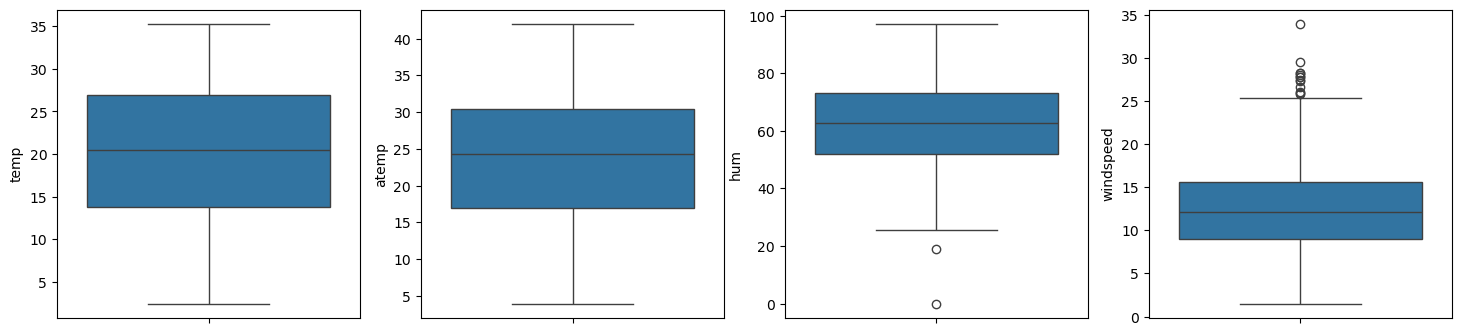

In [197]:
#Checking for outliers if any
# Draw box plots for indepent variables with continuous values

import matplotlib.pyplot as plt
import seaborn as sn
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sn.boxplot(y=col, data=df)
    i+=1

## Visualing the data

In [198]:
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,gloomy,good,rainy
0,spring,2018,1,Not Holiday,6,otherwise,gloomy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0
1,spring,2018,1,Not Holiday,0,otherwise,gloomy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0
2,spring,2018,1,Not Holiday,1,working,good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0
3,spring,2018,1,Not Holiday,2,working,good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0
4,spring,2018,1,Not Holiday,3,working,good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0
5,spring,2018,1,Not Holiday,4,working,good,8.378268,11.66045,51.8261,6.000868,1606,1,0,0,0,1,0
6,spring,2018,1,Not Holiday,5,working,gloomy,8.057402,10.44195,49.8696,11.304642,1510,1,0,0,1,0,0
7,spring,2018,1,Not Holiday,6,otherwise,gloomy,6.765000,8.11270,53.5833,17.875868,959,1,0,0,1,0,0
8,spring,2018,1,Not Holiday,0,otherwise,good,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,1,0
9,spring,2018,1,Not Holiday,1,working,good,6.184153,7.54440,48.2917,14.958889,1321,1,0,0,0,1,0


<Figure size 5000x5000 with 0 Axes>

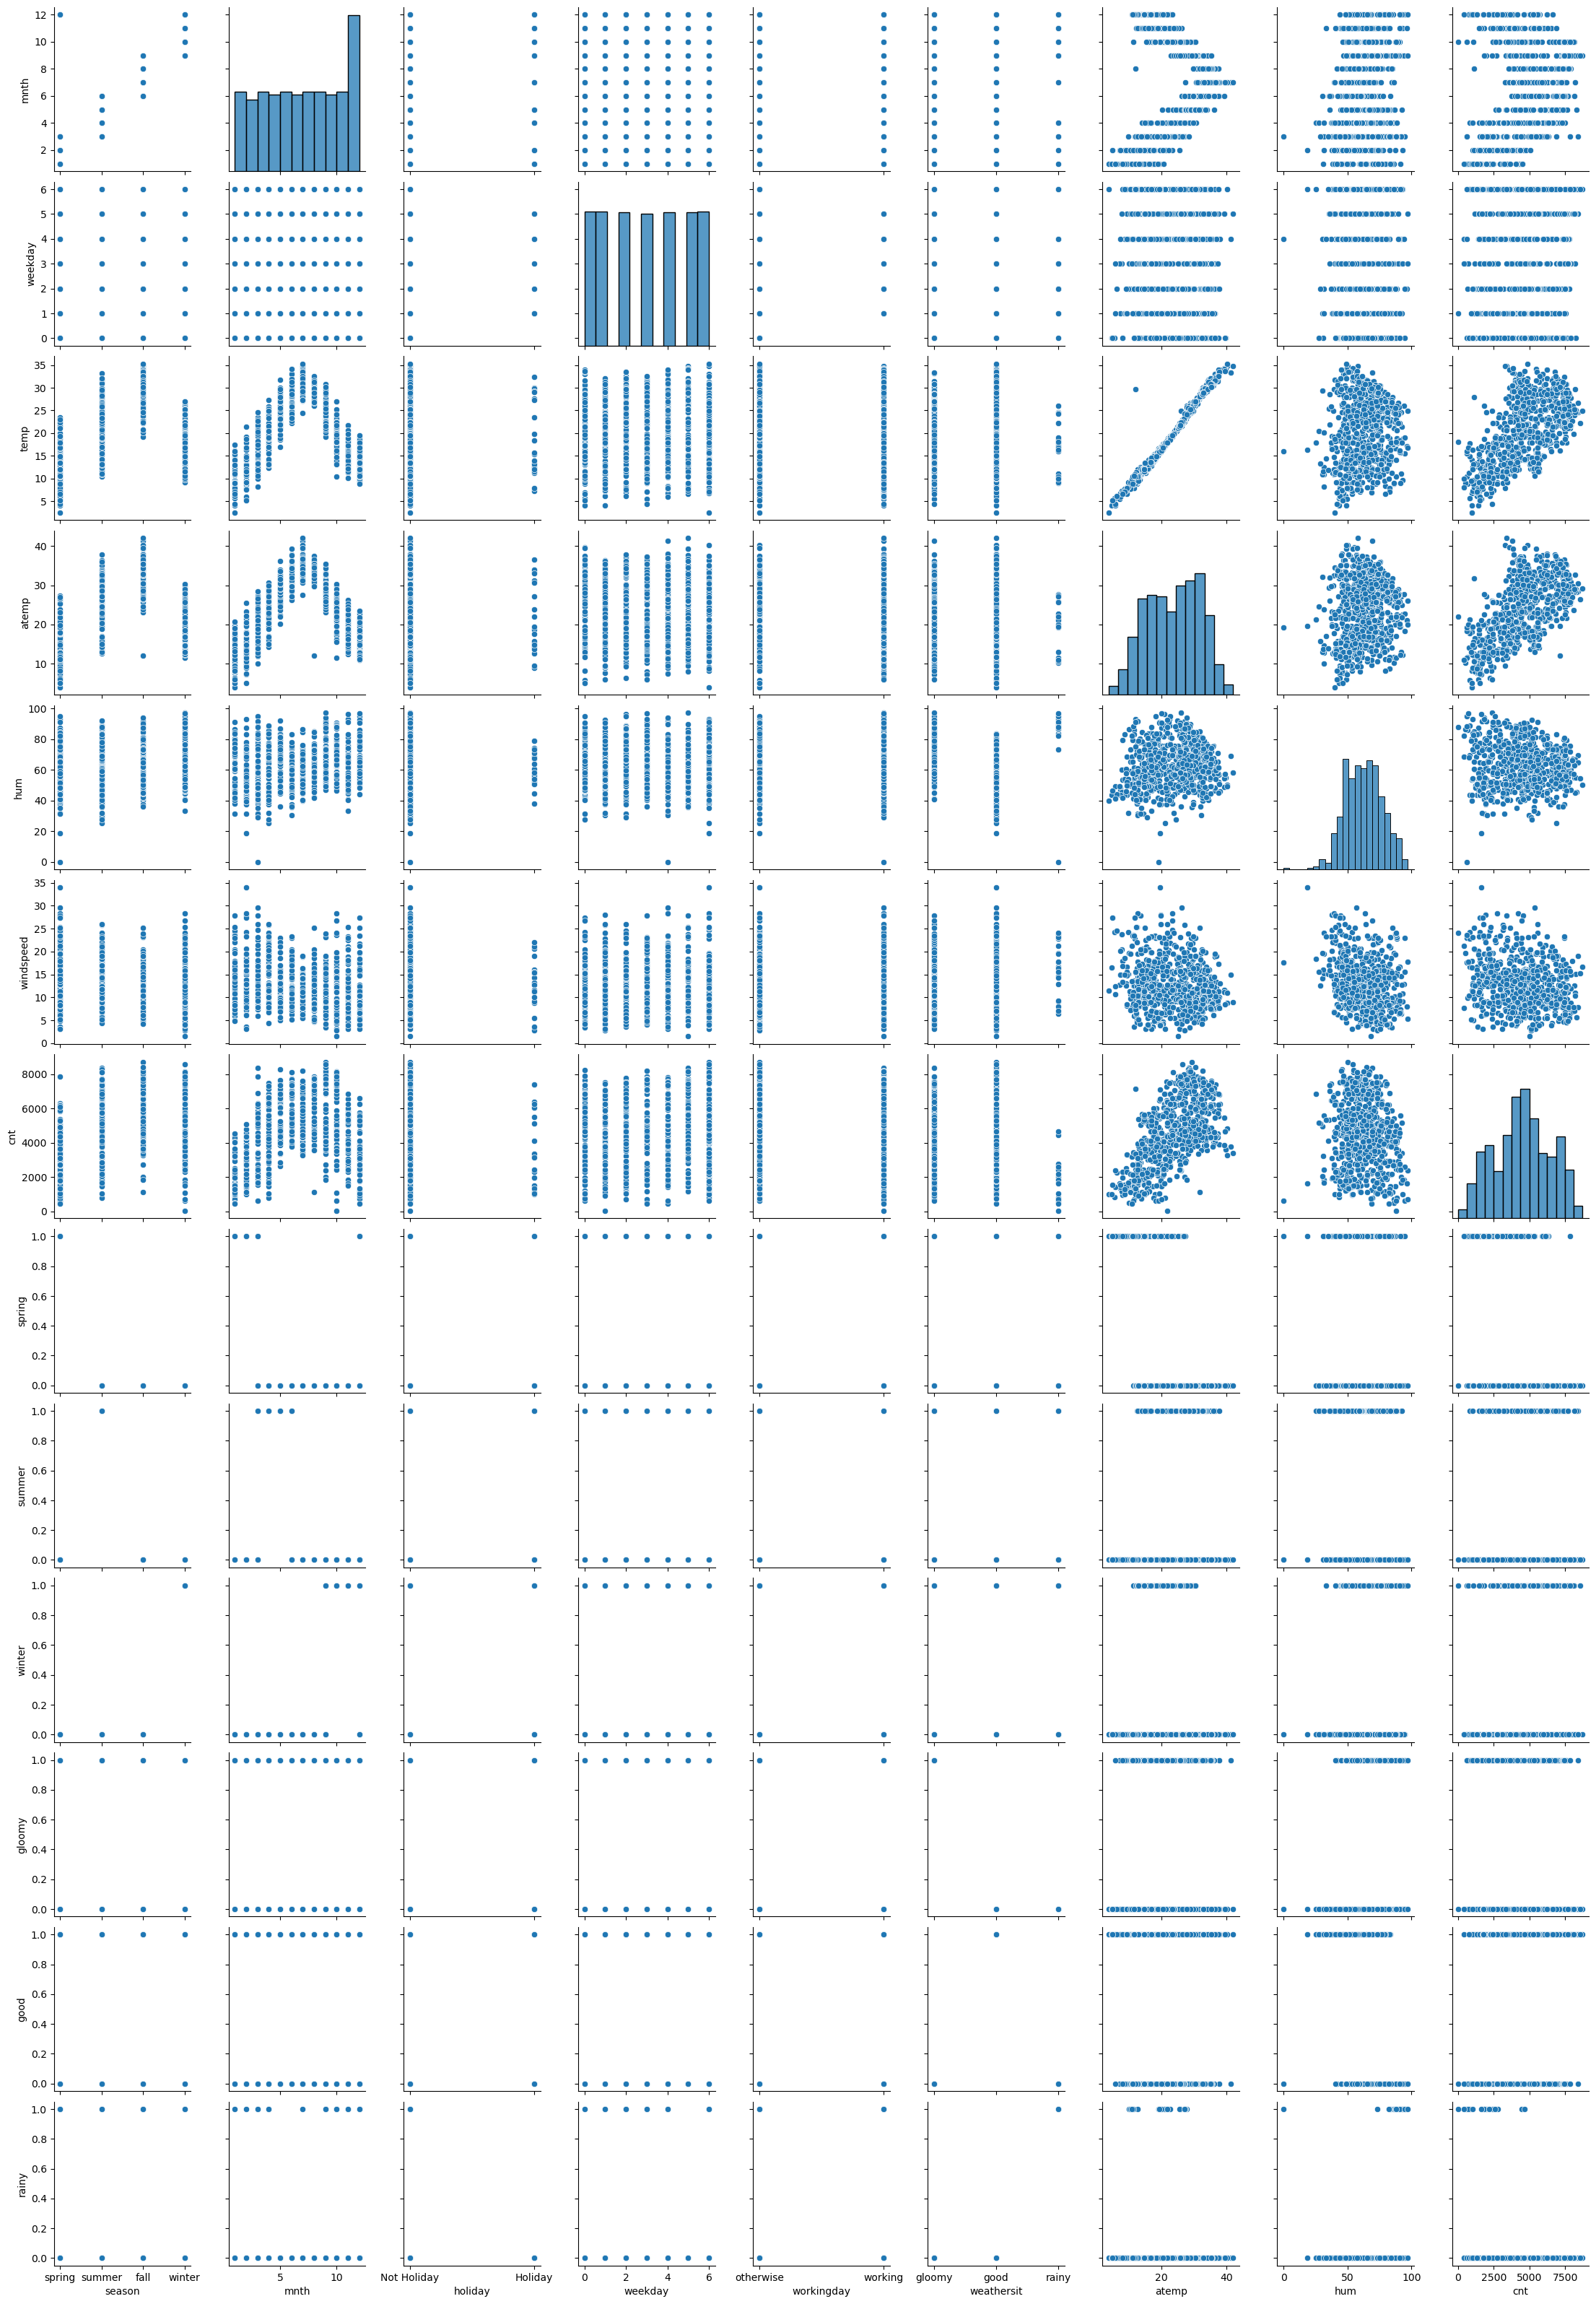

In [200]:
plt.figure(figsize =(50,50))
sn.pairplot(df,x_vars=['season','mnth','holiday','weekday','workingday','weathersit','atemp','hum','cnt'])
plt.show()

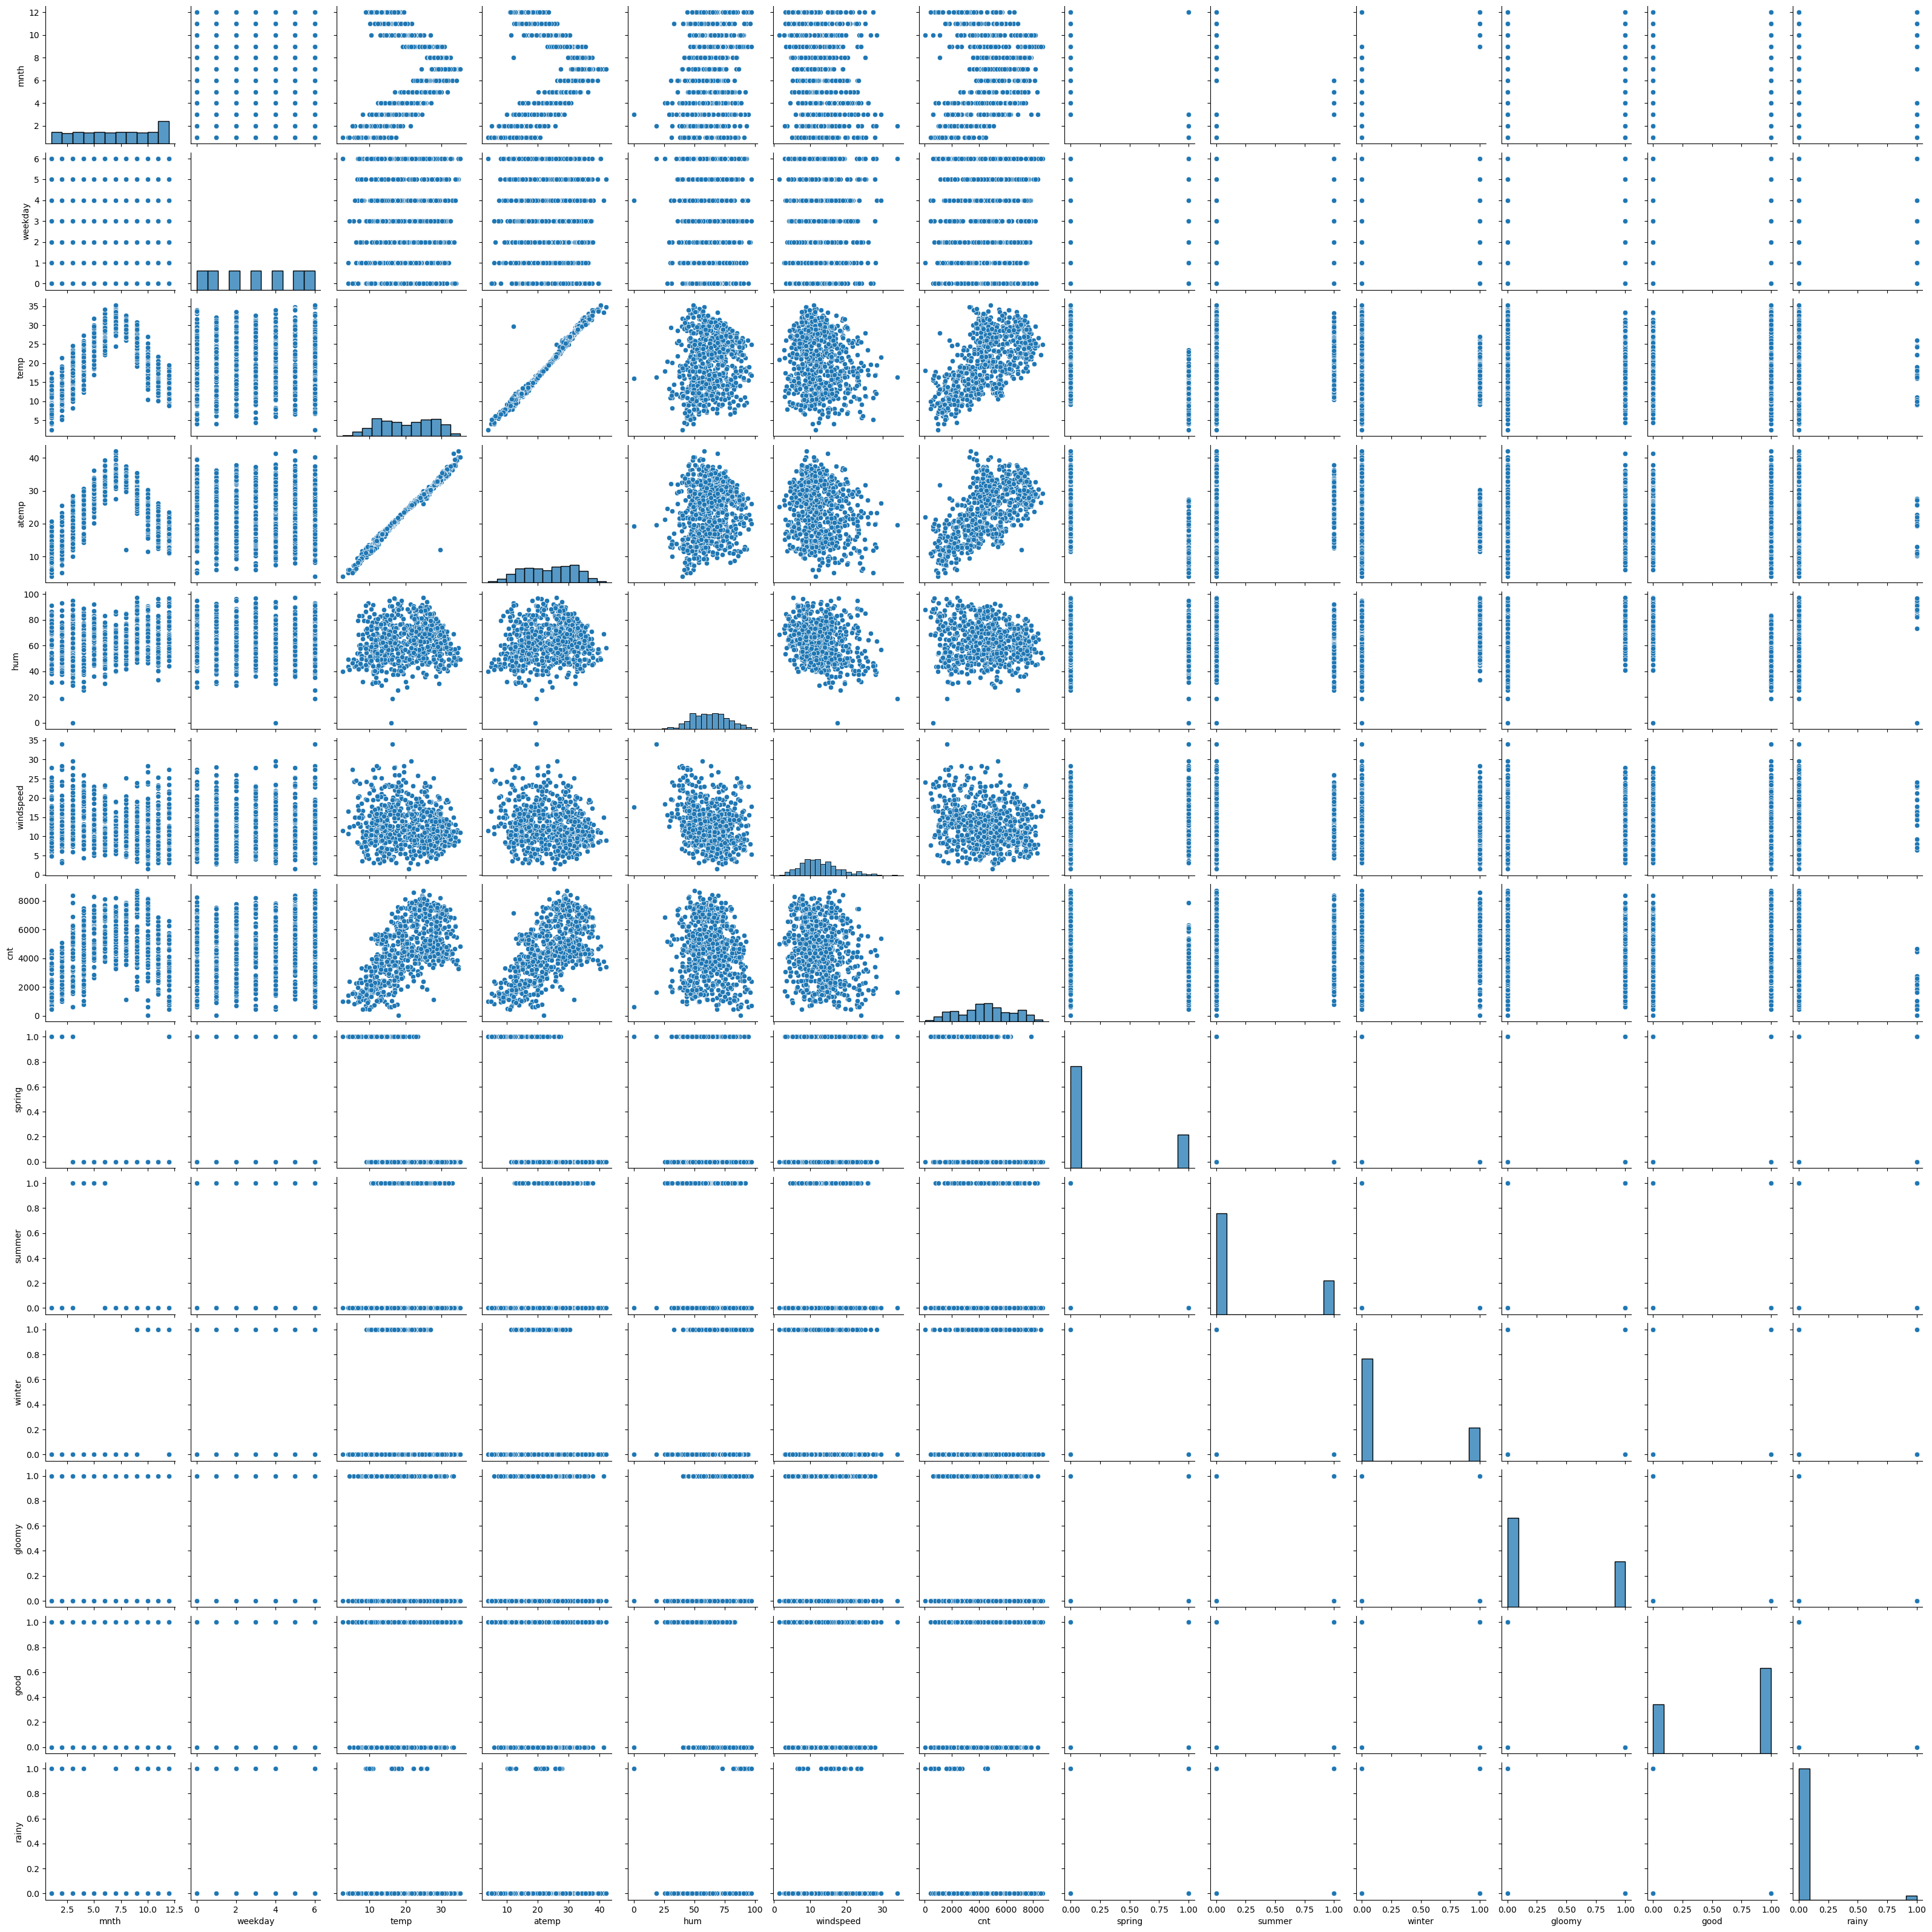

In [45]:
sn.pairplot(df)
plt.show()

<Figure size 1500x3000 with 0 Axes>

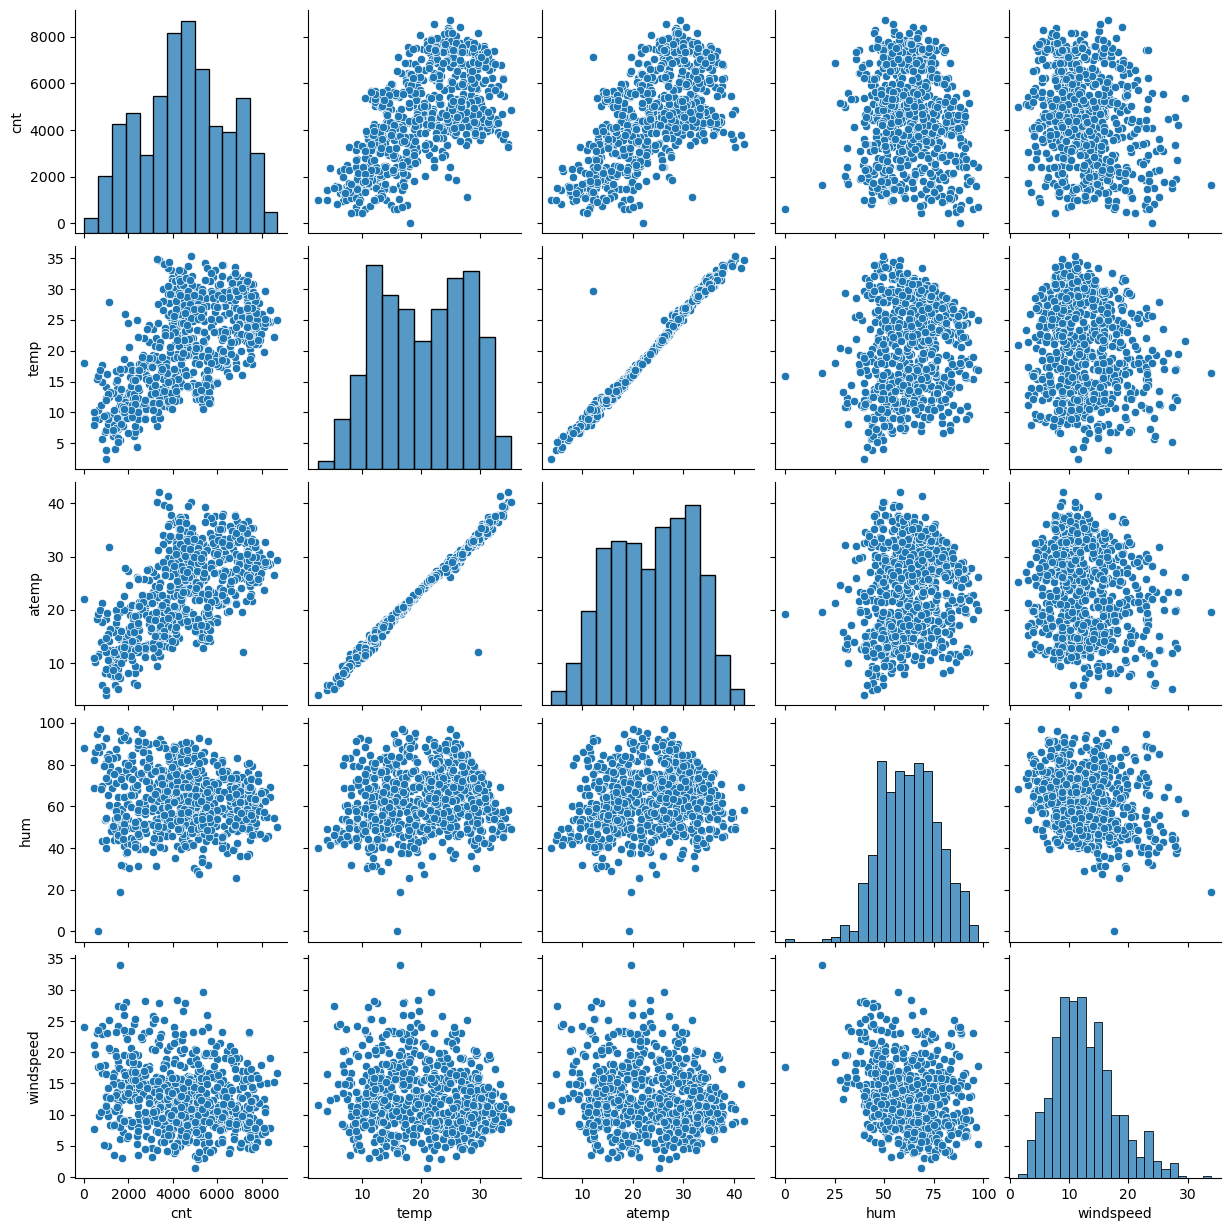

In [201]:
plt.figure(figsize = (15,30))
sn.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

## Visualize categorical data

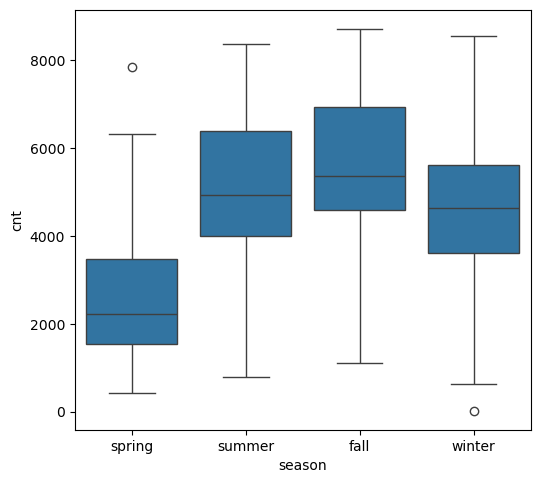

In [203]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sn.boxplot(x='season',data=df,y='cnt')
plt.show()


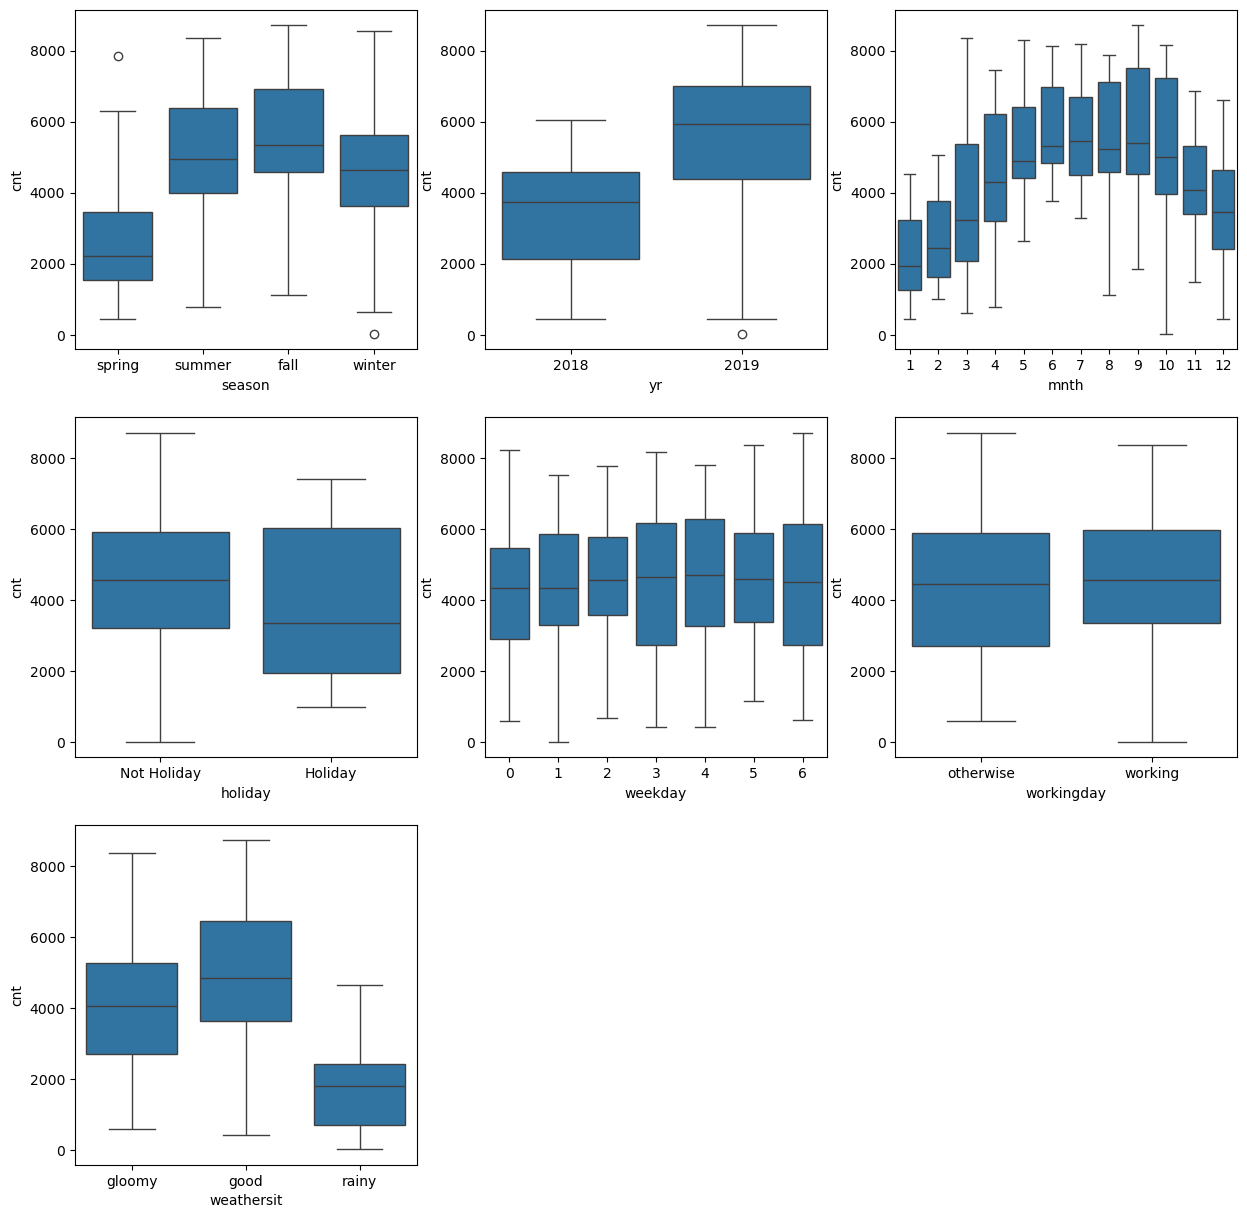

In [204]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sn.boxplot(data=df, x=i[1], y='cnt')
plt.show()

### Inference we can draw from the above plots
 - During the Fall season the Bike rent demand is high
 - In 2019 the demand was higher
 - The demand is high during the month of September and October of the year.During the end and beginning of year, it is less
 - During good weather demand is high 

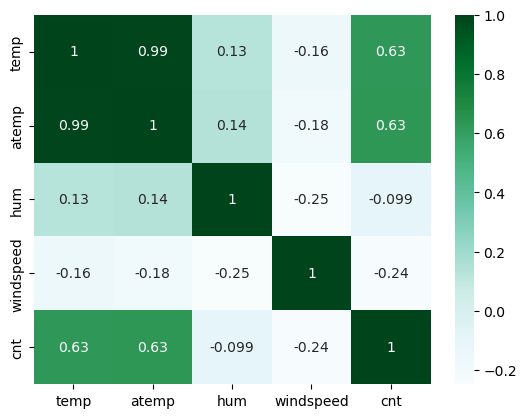

In [205]:
# Checking continuous variables relationship with each other
sn.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

### Correlation exist between atemp & temp with the cnt

## Data Preparation

In [206]:
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,gloomy,good,rainy
0,spring,2018,1,Not Holiday,6,otherwise,gloomy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0
1,spring,2018,1,Not Holiday,0,otherwise,gloomy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0
2,spring,2018,1,Not Holiday,1,working,good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0
3,spring,2018,1,Not Holiday,2,working,good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0
4,spring,2018,1,Not Holiday,3,working,good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0
5,spring,2018,1,Not Holiday,4,working,good,8.378268,11.66045,51.8261,6.000868,1606,1,0,0,0,1,0
6,spring,2018,1,Not Holiday,5,working,gloomy,8.057402,10.44195,49.8696,11.304642,1510,1,0,0,1,0,0
7,spring,2018,1,Not Holiday,6,otherwise,gloomy,6.765000,8.11270,53.5833,17.875868,959,1,0,0,1,0,0
8,spring,2018,1,Not Holiday,0,otherwise,good,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,1,0
9,spring,2018,1,Not Holiday,1,working,good,6.184153,7.54440,48.2917,14.958889,1321,1,0,0,0,1,0


In [207]:
df=df.drop(['season','weathersit'],axis =1)

In [208]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,gloomy,good,rainy
0,2018,1,Not Holiday,6,otherwise,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0
1,2018,1,Not Holiday,0,otherwise,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0
2,2018,1,Not Holiday,1,working,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0
3,2018,1,Not Holiday,2,working,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0
4,2018,1,Not Holiday,3,working,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0


In [209]:
# create dummy variables for workingday
workingday_status=pd.get_dummies(df['workingday'],dtype=int)

In [210]:
workingday_status

,otherwise,working
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
725,0,1
726,0,1
727,1,0
728,1,0


In [211]:
df=pd.concat([df,workingday_status],axis=1)

In [212]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,gloomy,good,rainy,otherwise,working
0,2018,1,Not Holiday,6,otherwise,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,1,0
1,2018,1,Not Holiday,0,otherwise,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,1,0
2,2018,1,Not Holiday,1,working,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,1
3,2018,1,Not Holiday,2,working,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,1
4,2018,1,Not Holiday,3,working,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,1


In [213]:
df=df.drop(['workingday'],axis=1)

In [214]:
df.head()

,yr,mnth,holiday,weekday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,gloomy,good,rainy,otherwise,working
0,2018,1,Not Holiday,6,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,1,0
1,2018,1,Not Holiday,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,1,0
2,2018,1,Not Holiday,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,1
3,2018,1,Not Holiday,2,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,1
4,2018,1,Not Holiday,3,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,1


In [215]:
# create dummy variables for weakday
weekday_status=pd.get_dummies(df['weekday'],dtype=int)

In [216]:
weekday_status=weekday_status.rename(columns={0: 'Tues', 1: 'Wed',2:'Thurs',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})
weekday_status.head()

,Tues,Wed,Thurs,Fri,Sat,Sun,Mon
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [217]:
df=pd.concat([df,weekday_status],axis=1)

In [219]:
df.head()

,yr,mnth,holiday,weekday,temp,atemp,hum,windspeed,cnt,spring,...,rainy,otherwise,working,Tues,Wed,Thurs,Fri,Sat,Sun,Mon
0,2018,1,Not Holiday,6,14.110847,18.18125,80.5833,10.749882,985,1,...,0,1,0,0,0,0,0,0,0,1
1,2018,1,Not Holiday,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,1,0,1,0,0,0,0,0,0
2,2018,1,Not Holiday,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,1,0,0,0,0,0
3,2018,1,Not Holiday,2,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,1,0,0,0,0
4,2018,1,Not Holiday,3,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,1,0,0,0


In [220]:
df=df.drop(['weekday'],axis=1)

In [221]:
df.head()

,yr,mnth,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,...,rainy,otherwise,working,Tues,Wed,Thurs,Fri,Sat,Sun,Mon
0,2018,1,Not Holiday,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,2018,1,Not Holiday,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,1,0,1,0,0,0,0,0,0
2,2018,1,Not Holiday,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,1,0,0,0,0,0
3,2018,1,Not Holiday,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,1,0,0,0,0
4,2018,1,Not Holiday,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,1,0,0,0


In [222]:
# create dummy variables for holiday
holdiday_status=pd.get_dummies(df['holiday'],dtype=int)

In [223]:
holdiday_status

,Holiday,Not Holiday
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
725,0,1
726,0,1
727,0,1
728,0,1


In [224]:
df=pd.concat([df,holdiday_status],axis=1)

In [225]:
df.head()

,yr,mnth,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,...,working,Tues,Wed,Thurs,Fri,Sat,Sun,Mon,Holiday,Not Holiday
0,2018,1,Not Holiday,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,0,1
1,2018,1,Not Holiday,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,1,0,0,0,0,0,0,0,1
2,2018,1,Not Holiday,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,1,0,0,0,0,0,0,1
3,2018,1,Not Holiday,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,1,0,0,0,0,0,1
4,2018,1,Not Holiday,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,1,0,0,0,0,1


In [226]:
df=df.drop(['holiday'],axis=1)

In [227]:
df.head()

,yr,mnth,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,working,Tues,Wed,Thurs,Fri,Sat,Sun,Mon,Holiday,Not Holiday
0,2018,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2018,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2018,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,1,0,1,0,0,0,0,0,0,1
3,2018,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,2018,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [228]:
# create dummy variables for mnth
mnth_status=pd.get_dummies(df['mnth'],dtype=int)

In [229]:
mnth_status

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,0,1


In [230]:
df=pd.concat([df,mnth_status],axis=1)

In [231]:
df

,yr,mnth,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,2018,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019,12,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,0,0,0,0,1
726,2019,12,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,0,0,0,0,0,1
727,2019,12,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,2019,12,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [232]:
df=df.drop(['mnth'],axis=1)

In [233]:
df.head()

,yr,temp,atemp,hum,windspeed,cnt,spring,summer,winter,gloomy,...,3,4,5,6,7,8,9,10,11,12
0,2018,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2018,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2018,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
df.shape

(730, 35)

In [235]:
#create dummy variables for yr
yr_status=pd.get_dummies(df['yr'],dtype=int)

In [236]:
yr_status

,2018,2019
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,1


In [237]:
df=pd.concat([df,yr_status],axis=1)

In [238]:
df

,yr,temp,atemp,hum,windspeed,cnt,spring,summer,winter,gloomy,...,5,6,7,8,9,10,11,12,2018,2019
0,2018,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2018,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2018,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2018,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
726,2019,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
727,2019,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
728,2019,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [239]:
df=df.drop(['yr'],axis=1)

In [240]:
df.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,gloomy,good,...,5,6,7,8,9,10,11,12,2018,2019
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### Split data into training and test

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#y to contain only target variable
y=df.pop('cnt')

#X is all remainign variable also our independent variables
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [242]:
X_train.shape

(511, 35)

In [243]:
X_test.shape

(219, 35)

In [244]:
y_train.shape

(511,)

In [245]:
y_test.shape

(219,)

### Scaling

In [246]:
X_train.head()

,temp,atemp,hum,windspeed,spring,summer,winter,gloomy,good,rainy,...,5,6,7,8,9,10,11,12,2018,2019
683,13.188347,16.22460,62.0417,10.250129,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
645,15.716653,19.38040,70.9583,12.708493,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
163,26.035000,30.08270,49.4583,20.458450,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
360,13.325000,16.38165,76.2500,12.626150,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
640,26.957500,29.95665,79.3750,4.458569,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [247]:
from sklearn.preprocessing import MinMaxScaler

In [248]:
scaler = MinMaxScaler()

In [276]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','gloomy','good','rainy','2018','2019' ]

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [277]:
X_train.head()

,temp,atemp,hum,windspeed,spring,summer,winter,gloomy,good,rainy,...,5,6,7,8,9,10,11,12,2018,2019
683,0.327133,0.322150,0.639330,0.327101,0,0,1,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0.0,1.0
645,0.403972,0.404998,0.731215,0.419004,0,0,1,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0.0,1.0
163,0.717562,0.685963,0.509660,0.708724,0,1,0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,1.0,0.0
360,0.331287,0.326273,0.785745,0.415925,1,0,0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1.0,0.0
640,0.745598,0.682653,0.817947,0.110593,0,0,1,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0.0,1.0


In [278]:
X_train.describe()

,temp,atemp,hum,windspeed,spring,summer,winter,gloomy,good,rainy,...,5,6,7,8,9,10,11,12,2018,2019
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000
mean,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,0.346380,0.624266,0.029354,...,0.091977,0.084149,0.091977,0.074364,0.09002,0.09002,0.091977,0.074364,0.479452,0.520548
std,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,0.476282,0.484786,0.168963,...,0.289276,0.277883,0.289276,0.262619,0.28649,0.28649,0.289276,0.262619,0.500067,0.500067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [279]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','gloomy','good','rainy','2018','2019']

X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

In [280]:
X_test.head()

,temp,atemp,hum,windspeed,spring,summer,winter,gloomy,good,rainy,...,5,6,7,8,9,10,11,12,2018,2019
468,0.536626,0.546708,0.401487,0.313071,0,1,0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0.0,1.0
148,0.769438,0.735147,0.804036,0.363028,0,1,0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1.0,0.0
302,0.299316,0.300486,0.555496,0.282038,0,0,1,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,1.0,0.0
355,0.439902,0.455298,0.725969,0.001356,1,0,0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1.0,0.0
515,0.786308,0.758457,0.388742,0.322536,0,1,0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0.0,1.0


In [281]:
X_test.describe()

,temp,atemp,hum,windspeed,spring,summer,winter,gloomy,good,rainy,...,5,6,7,8,9,10,11,12,2018,2019
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.519678,0.507304,0.539147,0.324686,0.283105,0.237443,0.228311,0.315068,0.657534,0.027397,...,0.068493,0.077626,0.068493,0.109589,0.063927,0.073059,0.059361,0.109589,0.547945,0.452055
std,0.249051,0.242829,0.188725,0.184328,0.451539,0.426491,0.420705,0.465607,0.475622,0.163612,...,0.253169,0.268194,0.253169,0.313092,0.245183,0.260830,0.236840,0.313092,0.498836,0.498836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.299316,0.296768,0.404246,0.190953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.498387,0.500985,0.513011,0.308561,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.735134,0.713566,0.670692,0.410267,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building a model using RFE (Automated Approach)

In [282]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [283]:
y_train.head()

683    5445
645    5478
163    5020
360    1162
640    7572
Name: cnt, dtype: int64

In [284]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp         511 non-null    float64
 1   atemp        511 non-null    float64
 2   hum          511 non-null    float64
 3   windspeed    511 non-null    float64
 4   spring       511 non-null    int32  
 5   summer       511 non-null    int32  
 6   winter       511 non-null    int32  
 7   gloomy       511 non-null    float64
 8   good         511 non-null    float64
 9   rainy        511 non-null    float64
 10  otherwise    511 non-null    int32  
 11  working      511 non-null    int32  
 12  Tues         511 non-null    int32  
 13  Wed          511 non-null    int32  
 14  Thurs        511 non-null    int32  
 15  Fri          511 non-null    int32  
 16  Sat          511 non-null    int32  
 17  Sun          511 non-null    int32  
 18  Mon          511 non-null    int32  
 19  Holiday    

In [285]:
X_train.head()

,temp,atemp,hum,windspeed,spring,summer,winter,gloomy,good,rainy,...,5,6,7,8,9,10,11,12,2018,2019
683,0.327133,0.322150,0.639330,0.327101,0,0,1,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0.0,1.0
645,0.403972,0.404998,0.731215,0.419004,0,0,1,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0.0,1.0
163,0.717562,0.685963,0.509660,0.708724,0,1,0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,1.0,0.0
360,0.331287,0.326273,0.785745,0.415925,1,0,0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1.0,0.0
640,0.745598,0.682653,0.817947,0.110593,0,0,1,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0.0,1.0


In [286]:
X_train.columns = X_train.columns.astype(str)

In [287]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [288]:
lr

LinearRegression()

In [289]:
# Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [290]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 19),
 ('spring', True, 1),
 ('summer', False, 21),
 ('winter', False, 20),
 ('gloomy', True, 1),
 ('good', True, 1),
 ('rainy', True, 1),
 ('otherwise', False, 12),
 ('working', True, 1),
 ('Tues', False, 10),
 ('Wed', False, 11),
 ('Thurs', False, 6),
 ('Fri', False, 17),
 ('Sat', False, 16),
 ('Sun', False, 15),
 ('Mon', True, 1),
 ('Holiday', False, 2),
 ('Not Holiday', False, 9),
 ('1', False, 14),
 ('2', False, 13),
 ('3', True, 1),
 ('4', False, 3),
 ('5', False, 18),
 ('6', False, 5),
 ('7', True, 1),
 ('8', False, 4),
 ('9', True, 1),
 ('10', True, 1),
 ('11', False, 7),
 ('12', False, 8),
 ('2018', True, 1),
 ('2019', True, 1)]

In [368]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [292]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [298]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['temp', 'atemp', 'hum', 'spring', 'gloomy', 'good', 'rainy', 'working',
       'Mon', '3', '7', '9', '10', '2018', '2019'],
      dtype='object')

In [294]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['windspeed', 'summer', 'winter', 'otherwise', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Holiday', 'Not Holiday', '1', '2', '4', '5', '6',
       '8', '11', '12'],
      dtype='object')

In [306]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['temp', 'atemp', 'hum', 'spring', 'gloomy', 'good', 'working',
       'Mon', '3', '7', '9', '10', '2018', '2019']]

In [296]:
X_train_rfe.shape

(511, 15)

## Build Model

#### RFE Model

In [317]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['temp', 'atemp', 'hum', 'spring', 'gloomy', 'good', 'working',
       'Mon','1','3', '7', '9', '10', '2018', '2019']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.84e-183
Time:                        16:26:57   Log-Likelihood:                -4133.9
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     496   BIC:                             8361.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        795.5236    243.265      3.270      0.0

### Model 2


In [318]:
# Dropping the variable 1 i.e. Jan month as it has negative coefficient and is insignificant as it has high p-value
cols = ['temp', 'atemp', 'hum', 'spring', 'gloomy', 'good', 'working',
       'Mon','3', '7', '9', '10', '2018', '2019']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.43e-184
Time:                        16:36:10   Log-Likelihood:                -4133.9
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     497   BIC:                             8355.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        795.3190    242.953      3.274      0.0

### Model 3

In [319]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['atemp', 'hum', 'spring', 'gloomy', 'good', 'working',
       'Mon','3', '7', '9', '10', '2018', '2019']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.63e-185
Time:                        16:38:02   Log-Likelihood:                -4134.4
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     498   BIC:                             8350.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        760.3940    240.109      3.167      0.0

### Model 4

In [320]:
# Dropping the variable hum as it has negative coefficient and p-value 0.005
cols = ['atemp', 'spring', 'gloomy', 'good', 'working',
       'Mon','3', '7', '9', '10', '2018', '2019']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.22e-184
Time:                        16:55:59   Log-Likelihood:                -4138.4
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     499   BIC:                             8352.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.0106    170.993      1.643      0.1

### Model 5

In [321]:
# Dropping the variable spring as it has negative coefficient
cols = ['atemp', 'gloomy', 'good', 'working',
       'Mon','3', '7', '9', '10', '2018', '2019']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     177.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.44e-157
Time:                        16:58:55   Log-Likelihood:                -4206.1
No. Observations:                 511   AIC:                             8434.
Df Residuals:                     500   BIC:                             8481.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -516.8121    180.452     -2.864      0.0

### Model 6

In [322]:
# Dropping the variable 2018 as it has negative coefficient 
cols = ['atemp', 'spring', 'gloomy', 'good', 'working',
       'Mon','3', '7', '9', '10','2019']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.22e-184
Time:                        17:01:23   Log-Likelihood:                -4138.4
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     499   BIC:                             8352.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -579.1743    256.824     -2.255      0.0

### Model 7

In [324]:
# Dropping the variable 7 July as it has negative coefficient and p-value 0.013
cols = ['atemp', 'spring', 'gloomy', 'good', 'working',
       'Mon','3', '9', '10', '2019']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     242.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.71e-184
Time:                        17:03:14   Log-Likelihood:                -4141.6
No. Observations:                 511   AIC:                             8305.
Df Residuals:                     500   BIC:                             8352.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -509.7512    256.667     -1.986      0.0

### Model 8

In [325]:
# Dropping the variable spring as it has negative coefficient
cols = ['atemp', 'gloomy', 'good', 'working',
       'Mon','3', '9', '10', '2019']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.32e-155
Time:                        17:05:20   Log-Likelihood:                -4212.6
No. Observations:                 511   AIC:                             8445.
Df Residuals:                     501   BIC:                             8488.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1705.3535    273.921     -6.226      0.0

### Model 9

In [327]:
# Dropping the variable 3 March as it has p-value 0.361
cols = ['atemp', 'gloomy', 'good', 'working',
       'Mon','9', '10', '2019']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     214.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.32e-156
Time:                        17:07:27   Log-Likelihood:                -4213.0
No. Observations:                 511   AIC:                             8444.
Df Residuals:                     502   BIC:                             8482.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1673.8870    271.706     -6.161      0.0

### Model 10

In [358]:
# Dropping the variable 3 March as it has p-value 0.361
cols = ['temp', 'good','working','spring',
       'Mon','9', '10', '2019']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     253.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.08e-171
Time:                        17:34:19   Log-Likelihood:                -4179.6
No. Observations:                 511   AIC:                             8377.
Df Residuals:                     502   BIC:                             8415.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1110.4757    178.234      6.230      0.0

### Here VIF seems to be almost acceptable, let's select model 10 as the final model since p-valus is 0.0 for all the features, R2 is 0.801 and Adjusted R2 is higher than the other model and F-statistics

## Model Evaluation

### Residual Analysis

In [371]:
y_train_pred = lr.predict(X_train)

In [374]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sn.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

C:\Users\SUDEEPz\AppData\Local\Temp\ipykernel_53736\2379818379.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(act-pred)


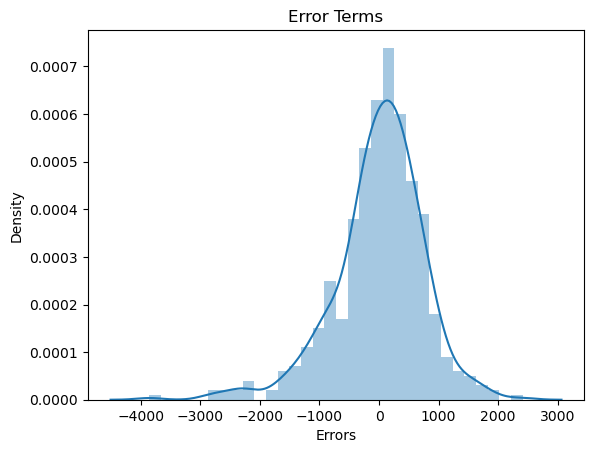

In [375]:
plot_res_dist(y_train, y_train_pred)

Errors are normally distribured here with mean 0. So everything seems to be fine

#### Predict values for test data set

In [378]:
X_test.columns = X_test.columns.astype(str)

In [383]:
#Predict the values for test data
y_test_pred = lr.predict(X_test)

### R-Squared value for test predictions

In [384]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8324184116560708

In [385]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['temp', 'good','working','spring',
       'Mon','9', '10', '2019']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     253.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.08e-171
Time:                        18:39:43   Log-Likelihood:                -4179.6
No. Observations:                 511   AIC:                             8377.
Df Residuals:                     502   BIC:                             8415.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1110.4757    178.234      6.230      0.0

## Interepretation of results

### Analysing the above model, the comapany should focus on the following features:
-Company should focus on expanding business during Spring.

-Company should focus on expanding business during September.

-Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.

-There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

-Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

### Conclusion

## Significant variables to predict the demand for shared bikes
-Temperature in Celsius

-Weather is Clear, Few clouds, Partly cloudy, Partly cloudy

-Working day

-Season Spring

-Weekday Monday

-Year 2019

-Months (September,October)